In [1]:
import cv2
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mping

In [2]:
red_s = np.array([[[255]*3]*72]*72)
red_t = np.array([[[255]*3]*72]*72)
blue_s = np.array([[[255]*3]*72]*72)
blue_t = np.array([[[255]*3]*72]*72)

In [5]:
# red square
#rgb channel

for i in range(52):
    for j in range(52):
        red_s[10+i,10+j,1:3] = 0

for i in range(52):
    for j in range(52):
        blue_s[10+i,10+j,0:2] = 0
        
for i in range(20):
    for j in range(-i,i,1):
        red_t[10+i,10+j,1:3] = 0

In [13]:
blue_s = blue_s.astype('uint8')

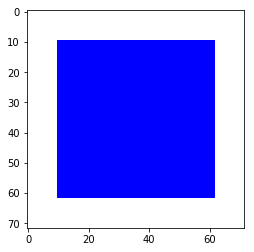

In [7]:
plt.imshow(blue_s)

In [15]:
def _threshold(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]



In [19]:
img = _threshold(cv2.cvtColor(blue_s, cv2.COLOR_RGB2GRAY))

In [22]:
?plt.imshow

In [12]:
blue_s.shape

(72, 72, 3)

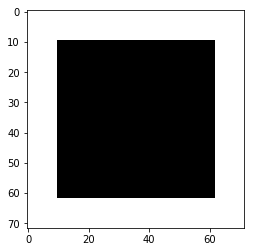

In [23]:
plt.imshow(img,cmap = 'gray')

In [148]:
g_kernel = cv2.getGaborKernel((8,8), 3.0, 0, 7.0, 0, 0)
g_ = cv2.getGaborKernel((8,8), 3.0,np.pi/2 , 7.0, 0, 0)

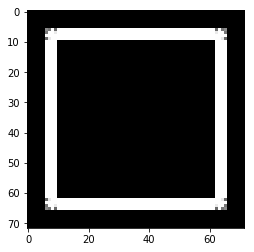

In [149]:
mj = cv2.filter2D(img,0, g_kernel) + cv2.filter2D(img,0, g_) 
plt.imshow(mj,cmap='gray')

In [150]:
blurred = cv2.GaussianBlur(mj, (5, 5), 0)
thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY++ cv2.THRESH_OTSU)[1]


In [151]:
np.max(thresh)

255

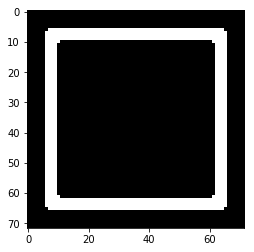

In [152]:
plt.imshow(thresh,cmap='gray')

In [77]:
import imutils

In [154]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, 
                        cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [165]:
cnts

[array([[[ 7,  6]],
 
        [[ 6,  7]],
 
        [[ 6, 64]],
 
        [[ 7, 65]],
 
        [[64, 65]],
 
        [[65, 64]],
 
        [[65,  7]],
 
        [[64,  6]]], dtype=int32)]

In [162]:
a = cv2.imread('red_tri.png')[:,:,::-1]

In [163]:
a = a.astype('uint8')

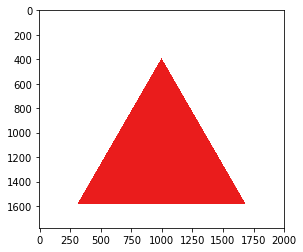

In [164]:
plt.imshow(a)

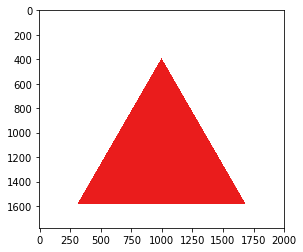

In [120]:
plt.imshow(a,cmap='gray')

In [177]:

img = cv2.resize(cv2.cvtColor(a, cv2.COLOR_RGB2GRAY),(72,72))
#img = cv2.GaussianBlur(img, (5, 5), 0)

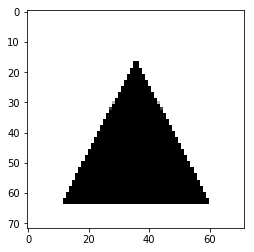

In [178]:
#img = _threshold(img)
plt.imshow(img,cmap = 'gray')

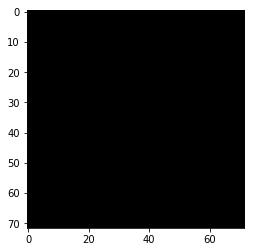

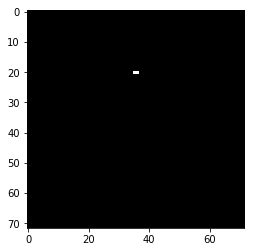

In [244]:
h_ = cv2.getGaborKernel((9,9), 4,3*np.pi/4 , 6.1, 0, 0)
g_ = cv2.getGaborKernel((9,9), 4,1*np.pi/4 , 6.1, 0, 0)

mj =  (cv2.bitwise_not(cv2.filter2D(img, 0, h_)) * cv2.bitwise_not(cv2.filter2D(img, 0, g_)) )
mj = mj.astype('uint8')
plt.imshow(mj,cmap='gray') 

In [ ]:
'''rough'''

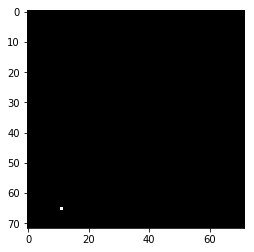

In [263]:
i_ = cv2.getGaborKernel((9,9), 6.5,1*np.pi/2 , 8.3, 0, 0)
g_ = cv2.getGaborKernel((9,9), 3.3,1*np.pi/4 , 5.9, 0, 0)

mj =  (((cv2.filter2D(img, 0, i_)))* cv2.bitwise_not(cv2.filter2D(img, 0, g_))) /2
mj = mj.astype('uint8')
plt.imshow(mj,cmap='gray') 

In [264]:
mj.shape

(72, 72)

In [265]:
for i in range(72):
    for j in range(72):
        if mj[i,j] > 0:
            print(i,j)

65 11


In [146]:
i_ = cv2.getGaborKernel((9,9),4,1*np.pi/2 ,6, 0, 0)

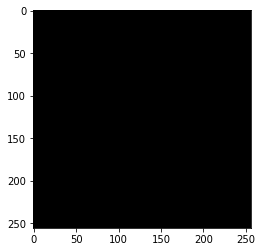

In [147]:
# mj = (cv2.filter2D(img,0, g_) + cv2.filter2D(img, 0, h_) + cv2.filter2D(img,0, i_))/(3)
# mj = mj.astype('uint8')
mj__ = cv2.filter2D(img, 0, i_)
plt.imshow(mj__,cmap='gray') 

In [134]:

mj = cv2.GaussianBlur(mj, (5, 5), 0)
mj_ = cv2.threshold(mj,60, 255, cv2.THRESH_BINARY)[1]
# mj_ = cv2.GaussianBlur(mj, (5, 5), 0)

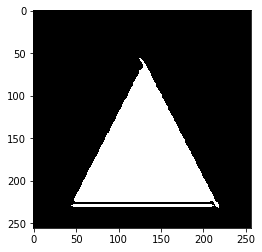

In [135]:
plt.imshow(mj_,cmap = 'gray')

In [107]:
mj_  = cv2.bitwise_not(mj_)

In [108]:
cnts = cv2.findContours(mj_.copy(), cv2.RETR_EXTERNAL, 
                        cv2.CHAIN_APPROX_SIMPLE)
# cnts = imutils.grab_contours(cnts)

In [109]:
cnts

(array([[128, 128, 128, ..., 128, 128, 128],
        [128, 128, 128, ..., 128, 128, 128],
        [128, 128, 128, ..., 128, 128, 128],
        ...,
        [128, 128, 128, ..., 128, 128, 128],
        [128, 128, 128, ..., 128, 128, 128],
        [128, 128, 128, ..., 128, 128, 128]], dtype=uint8),
 [array([[[  0,   0]],
  
         [[  0, 255]],
  
         [[255, 255]],
  
         [[255,   0]]], dtype=int32)],
 array([[[-1, -1, -1, -1]]], dtype=int32))

In [110]:
cnts = imutils.grab_contours(cnts)

In [111]:
cnts

[array([[[  0,   0]],
 
        [[  0, 255]],
 
        [[255, 255]],
 
        [[255,   0]]], dtype=int32)]

In [343]:
# cv2.getGaborKernel(ksize, sigma, theta, lambda, gamma, psi, ktype)
# ksize - size of gabor filter (n, n)
# sigma - standard deviation of the gaussian function
# theta - orientation of the normal to the parallel stripes
# lambda - wavelength of the sunusoidal factor
# gamma - spatial aspect ratio
# psi - phase offset
# ktype - type and range of values that each pixel in the gabor kernel can hold


In [350]:
g_kernel = cv2.getGaborKernel((21, 21), 100.0, 0*np.pi/6, 14, 10, 0, ktype=cv2.CV_32F)
g_ = cv2.getGaborKernel((21, 21), 100.0, np.pi/2, 14, 10, 0, ktype=cv2.CV_32F)

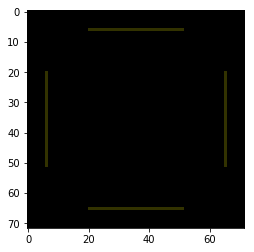

In [351]:
mj = cv2.filter2D(blue_s, cv2.CV_8UC3, g_kernel) + cv2.filter2D(blue_s, cv2.CV_8UC3, g_) 
plt.imshow(mj)

In [284]:
np.max(mj[0:52,0:52,0])

255

In [298]:
h, w = g_kernel.shape[:2]
g_kernel = cv2.resize(g_kernel, (3*w, 3*h), interpolation=cv2.INTER_CUBIC)


In [299]:
g_kernel.shape

(63, 63)

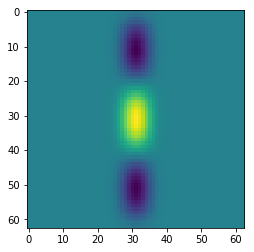

In [300]:
plt.imshow(g_kernel)


In [90]:
g_kernel[0]

array([-0.18015172, -0.15318304, -0.09155307, -0.01643873,  0.08953506,
        0.18979354,  0.26438022,  0.35559806,  0.44331783,  0.49716455,
        0.5440722 ,  0.5819253 ,  0.5895432 ,  0.565263  ,  0.5291317 ,
        0.47922835,  0.38093695,  0.27243987,  0.17512105,  0.02916672,
       -0.12093233, -0.2351291 , -0.379903  , -0.5203161 , -0.61031866,
       -0.6997229 , -0.77709055, -0.80687815, -0.80273926, -0.78297305,
       -0.73663646, -0.63351953, -0.5170587 , -0.40674067, -0.23643114,
       -0.06036257,  0.07687523,  0.25588062,  0.4305809 ,  0.5462687 ,
        0.67059016,  0.782009  ,  0.8348674 ,  0.8606287 ,  0.86976445,
        0.84171396,  0.76139253,  0.6670157 ,  0.5699168 ,  0.4146878 ,
        0.2531141 ,  0.12352728, -0.04966142, -0.21952507, -0.33513018,
       -0.4660561 , -0.5858393 , -0.6490412 , -0.6967794 , -0.7174174 ,
       -0.6987197 , -0.6809039 , -0.67914   ], dtype=float32)